# SC1015 Mini Project - Horstann, Julian, Kai Seong

## Importing libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from fredapi import Fred
fred = Fred(api_key='c9bf6c761c1df3965ce56d77ef6c8f77')
sns.set()

## Getting Data (FREDAPI) & Dropping Null Values

In [3]:
df = {}
df['gdp'] = fred.get_series('GDP') #1947-2021, quarterly
df['gnp'] = fred.get_series('GNP') #1947-2021, quarterly
df['real_gdp'] = fred.get_series('GDPC1') #1947-2021, quarterly
df['real_gdp_per_capita'] = fred.get_series('A939RX0Q048SBEA') #1947-2021, quarterly
df['net_exports'] = fred.get_series('NETEXP') #1947-2021, quarterly
df['gni'] = (df['gdp'] + df['net_exports'])
df['govt_spending'] = fred.get_series('GCEC1') #1947-2021, quarterly
df['consumer_spending'] = fred.get_series('PCEC') #1947-2021, quarterly
df['private_domestic_investment'] = fred.get_series('Y006RC1Q027SBEA') #1947-2021, quarterly
df['cpi'] = fred.get_series('CPIAUCSL', frequency='q', aggregation_method='avg') #1947-2022, quarterly
df['consumer_oil_price'] = fred.get_series('CUSR0000SEHE', frequency='q', aggregation_method='avg') #1947-2022, quarterly
df['ir'] = fred.get_series('INTDSRUSM193N', frequency='q', aggregation_method='avg') #1950-2021, quarterly
df['unemployment_rate'] = fred.get_series('UNRATE', frequency='q', aggregation_method='avg') #1948-2022, quarterly

df = pd.DataFrame(df)
df_clean= df.dropna() 
df_clean

,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,consumer_oil_price,ir,unemployment_rate
1950-01-01,280.828,282.056,2186.365,14500.0,2.203,283.031,599.569,182.920,1.071,23.587,11.033,1.50,6.4
1950-04-01,290.383,291.699,2253.045,14889.0,1.643,292.026,610.519,186.806,1.164,23.767,11.133,1.50,5.6
1950-07-01,308.153,309.760,2340.112,15398.0,-0.740,307.413,600.663,200.505,1.247,24.203,11.267,1.61,4.6
1950-10-01,319.945,321.554,2384.920,15623.0,-0.154,319.791,643.100,197.946,1.289,24.693,11.500,1.75,4.2
1951-01-01,336.000,337.537,2417.311,15769.0,0.177,336.177,711.537,209.207,1.296,25.697,11.700,1.75,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,19477.444,19649.442,17258.205,52031.0,-538.876,18938.568,3378.132,12989.729,519.850,256.418,219.570,0.25,13.0
2020-07-01,21138.574,21365.412,18560.774,55933.0,-725.723,20412.851,3360.238,14293.832,539.864,259.438,232.403,0.25,8.8
2020-10-01,21477.597,21728.223,18767.778,56533.0,-798.431,20679.166,3356.030,14467.611,561.269,260.879,234.862,0.25,6.8
2021-01-01,22038.226,22273.060,19055.655,57405.0,-872.540,21165.686,3390.921,15005.444,576.340,263.525,274.983,0.25,6.2


## Calculating Percentage Change

In [4]:
prcnt_chg = df_clean.pct_change()
prcnt_chg = prcnt_chg.dropna()
prcnt_chg

,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,consumer_oil_price,ir,unemployment_rate
1950-04-01,0.034024,0.034188,0.030498,0.026828,-0.254199,0.031781,0.018263,0.021244,0.086835,0.007631,0.009064,0.000000,-0.125000
1950-07-01,0.061195,0.061917,0.038644,0.034186,-1.450396,0.052691,-0.016144,0.073333,0.071306,0.018345,0.012036,0.073333,-0.178571
1950-10-01,0.038267,0.038075,0.019148,0.014612,-0.791892,0.040265,0.070650,-0.012763,0.033681,0.020245,0.020680,0.086957,-0.086957
1951-01-01,0.050180,0.049705,0.013582,0.009345,-2.149351,0.051240,0.106417,0.056889,0.005431,0.040659,0.017391,0.000000,-0.166667
1951-04-01,0.024077,0.024993,0.017327,0.013317,9.977401,0.029318,0.133288,-0.020387,0.027778,0.009729,0.019915,0.000000,-0.114286
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,-0.093287,-0.095382,-0.089373,-0.089810,-0.005246,-0.095564,0.009506,-0.100378,-0.018695,-0.008507,-0.163922,-0.841772,2.421053
2020-07-01,0.085285,0.087329,0.075475,0.074994,0.346735,0.077846,-0.005297,0.100395,0.038500,0.011778,0.058446,0.000000,-0.323077
2020-10-01,0.016038,0.016981,0.011153,0.010727,0.100187,0.013046,-0.001252,0.012158,0.039649,0.005554,0.010581,0.000000,-0.227273
2021-01-01,0.026103,0.025075,0.015339,0.015425,0.092818,0.023527,0.010397,0.037175,0.026852,0.010143,0.170828,0.000000,-0.088235


## Getting & Reformatting SP500 Data

In [5]:
SPX = pd.read_csv("SPX.csv") #1950-2022, monthly
SPXdf = SPX.drop(['Open','High','Low'], axis=1)
SPXdf['Date'] = pd.to_datetime(SPXdf['Date'], format='%d/%m/%Y')
SPXdf.set_index("Date", inplace=True)
SPXdf

,Close,Volume
Date,,
1950-01-31,17.05,25999998
1950-02-28,17.22,21027780
1950-03-31,17.29,24111109
1950-04-30,18.07,30088890
1950-05-31,18.78,27366665
...,...,...
2021-11-30,4567.00,47312253989
2021-12-31,4766.18,50024560087
2022-01-31,4515.55,54796994735


In [6]:
SPXdf = SPXdf.resample("Q", convention='start', origin='start').mean()
SPXdf.index = SPXdf.index + pd.offsets.MonthBegin(1)
SPXdf['ClosePrev'] = SPXdf['Close'] 
SPXdf['ClosePrev'] = SPXdf['ClosePrev'].shift(periods=1)
SPXdf

,Close,Volume,ClosePrev
Date,,,
1950-04-01,17.186667,2.371296e+07,NaN
1950-07-01,18.180000,2.760741e+07,17.186667
1950-10-01,18.570000,2.260370e+07,18.180000
1951-01-01,19.816667,3.068148e+07,18.570000
1951-04-01,21.620000,3.020555e+07,19.816667
...,...,...,...
2021-04-01,3832.760000,5.277860e+10,3549.220000
2021-07-01,4227.593333,4.502311e+10,3832.760000
2021-10-01,4408.493333,4.207726e+10,4227.593333


## Combine Both Datasets

In [7]:
df_full = pd.concat([df_clean,SPXdf], axis=1)
df_full = df_full.dropna()
df_full

,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,consumer_oil_price,ir,unemployment_rate,Close,Volume,ClosePrev
1950-07-01,308.153,309.760,2340.112,15398.0,-0.740,307.413,600.663,200.505,1.247,24.203,11.267,1.61,4.6,18.180000,2.760741e+07,17.186667
1950-10-01,319.945,321.554,2384.920,15623.0,-0.154,319.791,643.100,197.946,1.289,24.693,11.500,1.75,4.2,18.570000,2.260370e+07,18.180000
1951-01-01,336.000,337.537,2417.311,15769.0,0.177,336.177,711.537,209.207,1.296,25.697,11.700,1.75,3.5,19.816667,3.068148e+07,18.570000
1951-04-01,344.090,345.973,2459.196,15979.0,1.943,346.033,806.376,204.942,1.332,25.947,11.933,1.75,3.1,21.620000,3.020555e+07,19.816667
1951-07-01,351.385,353.381,2509.880,16234.0,3.742,355.127,895.015,207.616,1.385,25.933,11.933,1.75,3.2,21.636667,2.172778e+07,21.620000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,19477.444,19649.442,17258.205,52031.0,-538.876,18938.568,3378.132,12989.729,519.850,256.418,219.570,0.25,13.0,2921.443333,5.985144e+10,3136.440000
2020-07-01,21138.574,21365.412,18560.774,55933.0,-725.723,20412.851,3360.238,14293.832,539.864,259.438,232.403,0.25,8.8,3019.010000,6.714349e+10,2921.443333
2020-10-01,21477.597,21728.223,18767.778,56533.0,-798.431,20679.166,3356.030,14467.611,561.269,260.879,234.862,0.25,6.8,3378.143333,5.204018e+10,3019.010000
2021-01-01,22038.226,22273.060,19055.655,57405.0,-872.540,21165.686,3390.921,15005.444,576.340,263.525,274.983,0.25,6.2,3549.220000,5.152288e+10,3378.143333


In [18]:
prcnt_chg_new = df_full.pct_change()
prcnt_chg_new = prcnt_chg_new.dropna()
prcnt_chg_new['AbsClose'] = abs(prcnt_chg_new['Close'])
prcnt_chg_new

,gdp,gnp,real_gdp,real_gdp_per_capita,net_exports,gni,govt_spending,consumer_spending,private_domestic_investment,cpi,consumer_oil_price,ir,unemployment_rate,Close,Volume,ClosePrev,AbsClose
1950-10-01,0.038267,0.038075,0.019148,0.014612,-0.791892,0.040265,0.070650,-0.012763,0.033681,0.020245,0.020680,0.086957,-0.086957,0.021452,-0.181245,0.057797,0.021452
1951-01-01,0.050180,0.049705,0.013582,0.009345,-2.149351,0.051240,0.106417,0.056889,0.005431,0.040659,0.017391,0.000000,-0.166667,0.067133,0.357365,0.021452,0.067133
1951-04-01,0.024077,0.024993,0.017327,0.013317,9.977401,0.029318,0.133288,-0.020387,0.027778,0.009729,0.019915,0.000000,-0.114286,0.091001,-0.015512,0.067133,0.091001
1951-07-01,0.021201,0.021412,0.020610,0.015958,0.925888,0.026281,0.109923,0.013048,0.039790,-0.000540,0.000000,0.000000,0.032258,0.000771,-0.280669,0.091001,0.000771
1951-10-01,0.013640,0.014005,0.002202,-0.002587,0.119722,0.014758,0.052887,0.019141,0.077978,0.014807,-0.008380,0.000000,0.062500,0.062086,-0.164408,0.000771,0.062086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,-0.093287,-0.095382,-0.089373,-0.089810,-0.005246,-0.095564,0.009506,-0.100378,-0.018695,-0.008507,-0.163922,-0.841772,2.421053,-0.068548,0.457169,0.059181,0.068548
2020-07-01,0.085285,0.087329,0.075475,0.074994,0.346735,0.077846,-0.005297,0.100395,0.038500,0.011778,0.058446,0.000000,-0.323077,0.033397,0.121836,-0.068548,0.033397
2020-10-01,0.016038,0.016981,0.011153,0.010727,0.100187,0.013046,-0.001252,0.012158,0.039649,0.005554,0.010581,0.000000,-0.227273,0.118957,-0.224941,0.033397,0.118957
2021-01-01,0.026103,0.025075,0.015339,0.015425,0.092818,0.023527,0.010397,0.037175,0.026852,0.010143,0.170828,0.000000,-0.088235,0.050642,-0.009940,0.118957,0.050642


## Plotting Correlation Matrix

<AxesSubplot:>

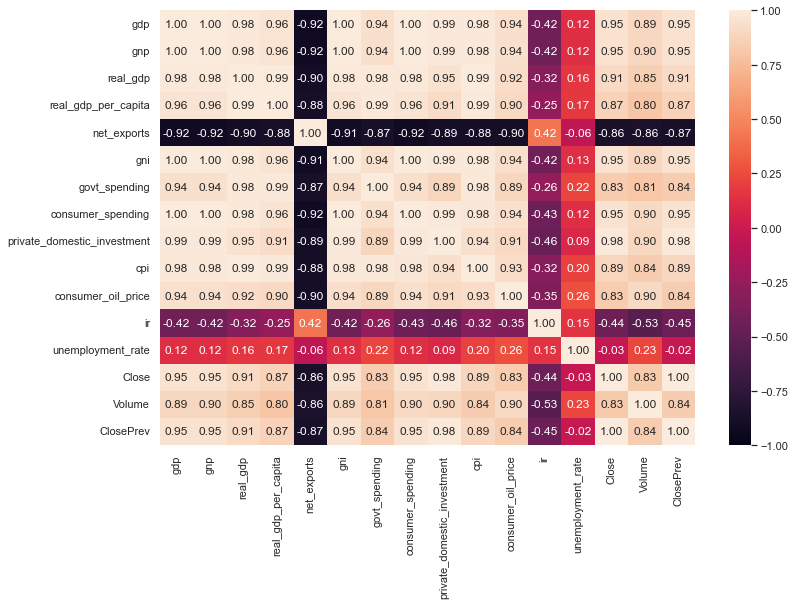

In [19]:
f, axes = plt.subplots(1,1,figsize=(12,8))
sns.heatmap(df_full.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')

<AxesSubplot:>

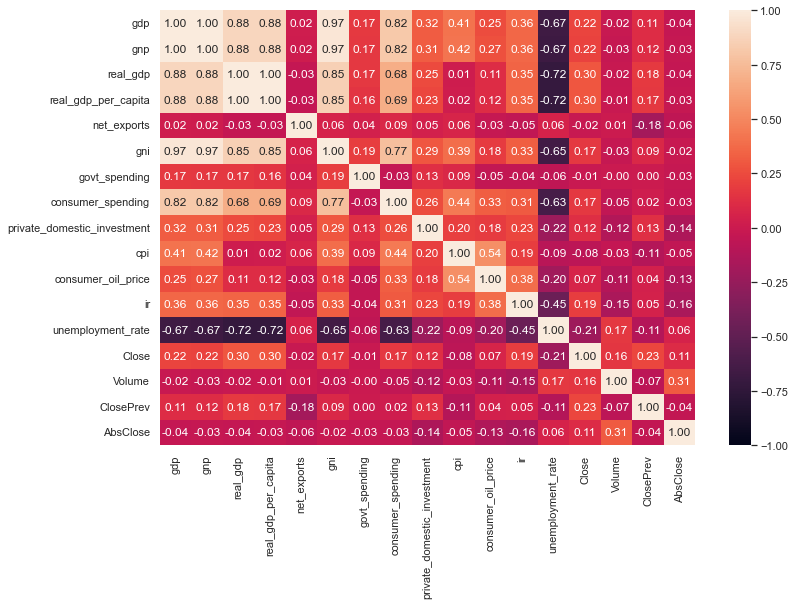

In [20]:
f, axes = plt.subplots(1,1,figsize=(12,8))
sns.heatmap(prcnt_chg_new.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')

## Preparing Data for LSTM Model

In [10]:
SPX['Date'] = pd.to_datetime(SPX['Date'], format='%d/%m/%Y')
SPX.set_index("Date", inplace=True)
SPX = SPX.resample("Q", convention='start', origin='start').mean()
SPX.index = SPX.index + pd.offsets.MonthBegin(1)
SPX

,Open,High,Low,Close,Volume
Date,,,,,
1950-04-01,16.983333,17.350000,16.903333,17.186667,2.371296e+07
1950-07-01,18.110000,18.750000,17.630000,18.180000,2.760741e+07
1950-10-01,18.070000,18.726667,17.723333,18.570000,2.260370e+07
1951-01-01,19.636667,20.303333,19.296667,19.816667,3.068148e+07
1951-04-01,21.463333,21.966667,21.233333,21.620000,3.020555e+07
...,...,...,...,...,...
2021-04-01,3779.430000,3938.580000,3703.890000,3832.760000,5.277860e+10
2021-07-01,4133.760000,4253.083333,4071.353333,4227.593333,4.502311e+10
2021-10-01,4412.130000,4504.393333,4302.256667,4408.493333,4.207726e+10


In [11]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=SPX.index, y=SPX["Close"], name="Close"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=SPX.index, y=SPX["Volume"], name="Volume"),
    secondary_y=True,
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Close</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Volume</b>", secondary_y=True)

fig.show()

## Create the Multi-Step LSTM Model

In [12]:
TimeSteps = 10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps = 5 # How many days in future you want to predict the prices

price = SPX[['Close']].values

# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler
 
# Standardise or normalise data so it better fits into model
#sc = StandardScaler()
sc = MinMaxScaler()
DataScaler = sc.fit(price)
X = DataScaler.transform(price)
X = X.reshape(X.shape[0],)

# split into samples
X_samples = list()
y_samples = list()
NumerOfRows = len(X)
 
# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################
 
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data = np.array(X_samples)
X_data = X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
# Don't reshape y as a 3D data  as it is supposed to be a single column only
y_data = np.array(y_samples)


# Choosing the number of testing data records
TestingRecords = 5
# Splitting the data into train and test
X_train = X_data[:-TestingRecords]
X_test = X_data[-TestingRecords:]
y_train = y_data[:-TestingRecords]
y_test = y_data[-TestingRecords:]

# Defining Input shapes for LSTM
TimeSteps = X_train.shape[1]
TotalFeatures = X_train.shape[2]


# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

###################################################################

import time
# Measuring the time taken by the model to train
StartTime = time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime = time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
54/54 [==============================] - 3s 11ms/step - loss: 0.0344
Epoch 2/100
54/54 [==============================] - 1s 9ms/step - loss: 0.0217
Epoch 3/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0089
Epoch 4/100
54/54 [==============================] - 1s 9ms/step - loss: 0.0048
Epoch 5/100
54/54 [==============================] - 1s 9ms/step - loss: 0.0036
Epoch 6/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0027
Epoch 7/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 8/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 9/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0018
Epoch 10/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0017
Epoch 11/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 12/100
54/54 [==============================] - 0s 9ms/step - loss: 0.0016
Epoch 13/100
54/54 [==============

## Finding Model's Accuracy

In [17]:
# Making predictions on test data
X_test = X_data[-TestingRecords:]
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)

# Getting the original price values for testing data
orig = y_test
orig = DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

for i in range(len(orig)):
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    Prediction = predicted_Price[i]
    Original = orig[i]
    
    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=SPX.shape[0]
    Date = (range(FutureTimeSteps), SPX.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :].index)[1].values
    Volume = (range(FutureTimeSteps), SPX.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['Volume'])[1].values
    
    # Visualising the results
    fig.add_trace(
        go.Scatter(x=Date, y=Prediction, name="Predicted Price"), secondary_y=False)
    
    fig.add_trace(
        go.Scatter(x=Date, y=Original, name="Actual Price"), secondary_y=False)
    
    fig.add_trace(
        go.Scatter(x=Date, y=Volume, name="Trading Volume", opacity=0.3), secondary_y=True)
    
    fig.update_layout(
        title_text='### Accuracy of the predictions: ' + str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2)) + '% ###'
    )

    fig.update_xaxes(title_text="<b>Date</b>")
    fig.update_yaxes(title_text="<b>Price</b>", secondary_y=False)
    fig.update_yaxes(title_text="<b>Trading Volume</b>", secondary_y=True)
    
    fig.show()

#### Predicted Prices ####
[[3045.8613 3159.735  3219.8604 3130.7712 3299.0625]
 [3153.0916 3270.0615 3339.5872 3257.969  3418.499 ]
 [3246.1807 3362.0696 3427.9902 3353.547  3521.664 ]
 [3312.2449 3428.7856 3493.6382 3422.332  3595.9275]
 [3347.4993 3472.4512 3548.6838 3468.7527 3638.4114]]

#### Original Prices ####
[[3136.44       2921.44333333 3019.01       3378.14333333 3549.22      ]
 [2921.44333333 3019.01       3378.14333333 3549.22       3832.76      ]
 [3019.01       3378.14333333 3549.22       3832.76       4227.59333333]
 [3378.14333333 3549.22       3832.76       4227.59333333 4408.49333333]
 [3549.22       3832.76       4227.59333333 4408.49333333 4646.18666667]]


## Testing Model on Existing Prices

In [14]:
end = 284 # 289 rows, so max end = 289-(no. of days predicting ahead)

# Reshaping the data to (-1,1 )because its a single entry
LastNDaysPrices = SPX[['Close']][end-TimeSteps:end].values
LastNDaysPrices = LastNDaysPrices.reshape(-1, 1)

Original = (range(FutureTimeSteps), SPX.iloc[end:end+FutureTimeSteps, :]['Close'])[1].values
Date1 = (range(TimeSteps+FutureTimeSteps), SPX.iloc[end-TimeSteps : end, :].index)[1].values
Date2 = (range(TimeSteps+FutureTimeSteps), SPX.iloc[end : end+FutureTimeSteps, :].index)[1].values
Volume = (range(FutureTimeSteps), SPX.iloc[end-TimeSteps : end+FutureTimeSteps, :]['Volume'])[1].values

print(Volume)

# Scaling the data on the same level on which model was trained
X_test = DataScaler.transform(LastNDaysPrices)

NumberofSamples = 1
TimeSteps = X_test.shape[0]
NumberofFeatures = X_test.shape[1]
# Reshaping the data as 3D input
X_test = X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)

# Generating the predictions for next 5 days
Prediction = regressor.predict(X_test)
Prediction = DataScaler.inverse_transform(Prediction)
Prediction = Prediction[0]

LastNDaysPrices = (range(FutureTimeSteps), SPX.iloc[end-TimeSteps:end, :]['Close'])[1].values

# Visualising the results
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=Date1, y=LastNDaysPrices, name=f"Last {TimeSteps} Steps' Price"), secondary_y=False)

fig.add_trace(
    go.Scatter(x=Date2, y=Prediction, name="Predicted Price"), secondary_y=False)

fig.add_trace(
    go.Scatter(x=Date2, y=Original, name="Actual Price"), secondary_y=False)

fig.add_trace(
    go.Scatter(x=np.concatenate((Date1, Date2), axis=0), y=Volume, name="Trading Volume", opacity=0.3), secondary_y=True)

fig.update_layout(
    title_text='### Accuracy of the predictions: ' + str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2)) + '% ###'
)

fig.update_xaxes(title_text="<b>Date</b>")
fig.update_yaxes(title_text="<b>Price</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Trading Volume</b>", secondary_y=True)

fig.show()

[3.63467537e+10 4.72093722e+10 4.24409889e+10 4.02493241e+10
 4.14706000e+10 4.10737907e+10 5.98514426e+10 6.71434917e+10
 5.20401820e+10 5.15228771e+10 5.27785977e+10 4.50231082e+10
 4.20772559e+10 4.63188462e+10 4.74269711e+10]


## Testing Model on Future Prices

In [15]:
end = 289 # 289 rows, so max end = 289

# Reshaping the data to (-1,1 )because its a single entry
LastNDaysPrices = SPX[['Close']][end-TimeSteps:end].values
LastNDaysPrices = LastNDaysPrices.reshape(-1, 1)

# Collect dates
Date1 = (range(TimeSteps), SPX.iloc[end-TimeSteps : end, :].index)[1].values
Date2 = []
for i in range (FutureTimeSteps):
    Date2 = np.append(Date2, pd.Timestamp(Date1[len(Date1)-1]) + pd.DateOffset(months=3*i+3))

# Scaling the data on the same level on which model was trained
X_test = DataScaler.transform(LastNDaysPrices)

NumberofSamples = 1
TimeSteps = X_test.shape[0]
NumberofFeatures = X_test.shape[1]
# Reshaping the data as 3D input
X_test = X_test.reshape(NumberofSamples,TimeSteps,NumberofFeatures)

# Generating the predictions for next 5 days
Prediction = regressor.predict(X_test)
Prediction = DataScaler.inverse_transform(Prediction)
Prediction = Prediction[0]

LastNDaysPrices = (range(FutureTimeSteps), SPX.iloc[end-TimeSteps:end, :]['Close'])[1].values

# Visualising the results
fig = make_subplots(specs=[[{"secondary_y": False}]])

fig.add_trace(
    go.Scatter(x=Date1, y=LastNDaysPrices, name=f"Last {TimeSteps} Steps' Price"))

fig.add_trace(
    go.Scatter(x=Date2, y=Prediction, name="Predicted Price"))

fig.update_layout(
    title_text = f'Price for the Next {FutureTimeSteps} Days'
)

fig.update_xaxes(title_text="<b>Date</b>")
fig.update_yaxes(title_text="<b>Price</b>")

fig.show()

## Sources:
SP500 Data - https://stooq.com/q/d/?s=%5Espx&c=0&i=m   
LSTM Model - https://thinkingneuron.com/predicting-stock-prices-using-deep-learning-lstm-model-in-python/   
FRED API - https://fred.stlouisfed.org/docs/api/fred/